w : [0.99968 0.49984] 

Distance : 2.000640204865558 

Support Vectors : [(1.0, 3.0), (2.0, 1.0), (3.0, 3.0), (4.0, 1.0)]


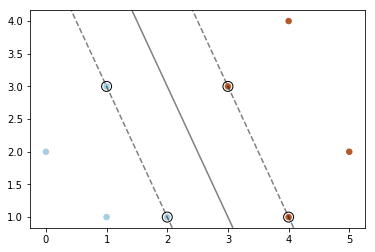

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
# X, y = make_blobs(n_samples=60, centers=2, random_state=6)

training_data=np.array([[0, 2, 0],[1, 1, 0],[1, 3, 0],[2, 1, 0],[3, 3, 1],[4, 1, 1],[4, 4, 1],[5, 2, 1]])
X = training_data[:, :2]
y = np.array([int(i) for i in training_data[:,2]])

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Get value of w and a
w = clf.coef_[0]
a = -w[0] / w[1]

# Margin calculaation 
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

print('w :',w,"\n")
print('Distance :',np.sqrt(1 + a ** 2) * margin,"\n")
print('Support Vectors :',[(i[0],i[1]) for i in clf.support_vectors_])

plt.savefig("plot")
plt.show()

In [18]:
clf.coef_

array([[0.99968, 0.49984]])

In [17]:
w_norm

1.1176762178734947